<a href="https://colab.research.google.com/github/benjacd/t1_mineria/blob/main/Taller1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importacion de DataSet

In [ ]:
#librerias basicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
#Importar datos
from google.colab import drive
drive.mount('/content/drive')
#Nombrar columnas
data = pd.read_csv('/content/drive/MyDrive/Mineria de datos/Licencias_Medicas_2022t2.txt', sep = "|",names=['CODIGO ISAPRE','FECHA INFORMACIÓN', 'RUN TRABAJADOR', 'FECHA EMISIÓN LICENCIA',
'NÚMERO DE DÍAS','FECHA INICIO REPOSO', 'EDAD TRABAJADOR','SEXO TRABAJADOR','ACTIVIDAD LABORAL','OCUPACIÓN','TIPO DE LICENCIA','CARACTERÍSTICAS DEL REPOSO','RUN PROFESIONAL','TIPO PROFESIONAL'
,'TIPO LICENCIA SEGÚN CONTRALORÍA','NÚMERO DE DÍAS AUTORIZADOS','DIAGNÓSTICO PRINCIPAL','TIPO DE RESOLUCIÓN','PERIODO','REPOSO AUTORIZADO','DERECHO A SUBSIDIO','FECHA RECEPCIÓN ISAPRE',
'FECHA RESOLUCIÓN ISAPRE','FECHA RECEPCIÓN EMPLEADOR','REGIÓN','CALIDAD TRABAJADOR','ENTIDAD PAGADORA','NÚMERO DÍAS A PAGAR','MONTO SUBSIDIO LIQUIDO','MONTO APORTE PREVISIONAL ISAPRE'
,'FECHA DE INICIO DEL PAGO','RECUPERABILIDAD','FECHA DE CONCEPCIÓN','MONTO APORTE PREVISIONAL DE PENSIONES','OTROS DIAGNÓSTICOS','RUN IDENTIFICACIÓN DEL HIJO','LUGAR DE REPOSO',
'CAUSA RECHAZO O MODIFICACIÓN','NÚMERO DÍAS PREVIOS AUTORIZADOS', 'FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL','FECHA CONTRATO DE TRABAJO','MONTO BASE CÁLCULO SUBSIDIO',
'RUT EMPLEADOR','FECHA NACIMIENTO HIJO','borrar'])
#Creo data frame nuevo para no modificar el original
df = data.copy()
#Borrar columna restante
df = df.drop('borrar', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Muestra total de columnas
pd.set_option('display.max_columns', None)
df.head(5)

,CODIGO ISAPRE,FECHA INFORMACIÓN,RUN TRABAJADOR,FECHA EMISIÓN LICENCIA,NÚMERO DE DÍAS,FECHA INICIO REPOSO,EDAD TRABAJADOR,SEXO TRABAJADOR,ACTIVIDAD LABORAL,OCUPACIÓN,TIPO DE LICENCIA,CARACTERÍSTICAS DEL REPOSO,RUN PROFESIONAL,TIPO PROFESIONAL,TIPO LICENCIA SEGÚN CONTRALORÍA,NÚMERO DE DÍAS AUTORIZADOS,DIAGNÓSTICO PRINCIPAL,TIPO DE RESOLUCIÓN,PERIODO,REPOSO AUTORIZADO,DERECHO A SUBSIDIO,FECHA RECEPCIÓN ISAPRE,FECHA RESOLUCIÓN ISAPRE,FECHA RECEPCIÓN EMPLEADOR,REGIÓN,CALIDAD TRABAJADOR,ENTIDAD PAGADORA,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LIQUIDO,MONTO APORTE PREVISIONAL ISAPRE,FECHA DE INICIO DEL PAGO,RECUPERABILIDAD,FECHA DE CONCEPCIÓN,MONTO APORTE PREVISIONAL DE PENSIONES,OTROS DIAGNÓSTICOS,RUN IDENTIFICACIÓN DEL HIJO,LUGAR DE REPOSO,CAUSA RECHAZO O MODIFICACIÓN,NÚMERO DÍAS PREVIOS AUTORIZADOS,FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL,FECHA CONTRATO DE TRABAJO,MONTO BASE CÁLCULO SUBSIDIO,RUT EMPLEADOR,FECHA NACIMIENTO HIJO
0,107,2022t2,47878798,2022t2,84,2022t2,26-30,Femenino,Servicios,Profesor,Licencia Maternal,Reposo Total,3004969,Medico,Licencia Maternal,84,NaN,Autoricese,Continuacion,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,84,2406186,467710,2022t2,SI,2021,249791,NaN,2011057352,Su Domicilio,Z. Sin Clasificar,187,2019t1,2019t1,859352,261926630,1800
1,67,2022t2,3078522,2022t2,7,2022t2,36-40,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,769949,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,200239,34619,2022t2,SI,1800,43103,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,858167,261926630,1800
2,107,2022t2,40458254,2022t2,7,2022t2,31-35,Masculino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,769949,Medico,Enf. o Acc. no del Trabajo,7,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,7,145716,16878,1800t1,SI,1800,27583,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2017t1,2017t1,1092870,261926630,1800
3,107,2022t2,2979082,2022t1,5,2022t1,41-45,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,262070233,Medico,Enf. o Acc. no del Trabajo,5,U00-U99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t1,13,Trab. Dep. Sector Privado,Isapre,5,82889,14820,2022t2,SI,1800,17391,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2020t1,2020t1,1243330,261926630,1800
4,107,2022t2,2081595,2022t2,15,2022t2,31-35,Femenino,Transporte,Profesor,Enf. o Acc. no del Trabajo,Reposo Total,2010807355,Medico,Enf. o Acc. no del Trabajo,15,F00-F99,Autoricese,Primera,Reposo Total,Verificado Requisitos Legales,2022t2,2022t2,2022t2,13,Trab. Dep. Sector Privado,Isapre,15,375447,82552,1800t1,SI,1800,63917,NaN,1529982,Su Domicilio,Z. Sin Clasificar,0,2013t1,2013t1,750894,261926630,1800


Identificacion de variables a usar en el set de datos


In [ ]:
#Eliminacion variables que no se utilizaran en el dataset
df = df.drop('CODIGO ISAPRE', axis=1)
df = df.drop('FECHA INFORMACIÓN', axis=1)
df = df.drop('RUN TRABAJADOR', axis=1)
df = df.drop('FECHA EMISIÓN LICENCIA', axis=1)
df = df.drop('FECHA INICIO REPOSO', axis=1)
df = df.drop('TIPO DE LICENCIA', axis=1)
df = df.drop('CARACTERÍSTICAS DEL REPOSO', axis=1)
df = df.drop('RUN PROFESIONAL', axis=1)
df = df.drop('TIPO PROFESIONAL', axis=1)
df = df.drop('TIPO LICENCIA SEGÚN CONTRALORÍA', axis=1)
df = df.drop('PERIODO', axis=1)
df = df.drop('DERECHO A SUBSIDIO', axis=1)
df = df.drop('FECHA RECEPCIÓN ISAPRE', axis=1)
df = df.drop('FECHA RESOLUCIÓN ISAPRE', axis=1)
df = df.drop('ENTIDAD PAGADORA', axis=1)
df = df.drop('CALIDAD TRABAJADOR', axis=1)
df = df.drop('FECHA RECEPCIÓN EMPLEADOR', axis=1)
df = df.drop('FECHA DE INICIO DEL PAGO', axis=1)
df = df.drop('FECHA DE CONCEPCIÓN', axis=1)
df = df.drop('RUN IDENTIFICACIÓN DEL HIJO', axis=1)
df = df.drop('FECHA PRIMERA AFILIACIÓN ENTIDAD PREVISIONAL', axis=1)
df = df.drop('FECHA CONTRATO DE TRABAJO', axis=1)
df = df.drop('RUT EMPLEADOR', axis=1)
df = df.drop('FECHA NACIMIENTO HIJO', axis=1)
df = df.drop('DIAGNÓSTICO PRINCIPAL', axis=1)
df = df.drop('OCUPACIÓN', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573493 entries, 0 to 573492
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   NÚMERO DE DÍAS                         573493 non-null  int64 
 1   EDAD TRABAJADOR                        573493 non-null  object
 2   SEXO TRABAJADOR                        573493 non-null  object
 3   ACTIVIDAD LABORAL                      573493 non-null  object
 4   NÚMERO DE DÍAS AUTORIZADOS             573493 non-null  int64 
 5   TIPO DE RESOLUCIÓN                     573493 non-null  object
 6   REPOSO AUTORIZADO                      573493 non-null  object
 7   REGIÓN                                 573493 non-null  int64 
 8   NÚMERO DÍAS A PAGAR                    573493 non-null  int64 
 9   MONTO SUBSIDIO LIQUIDO                 573493 non-null  int64 
 10  MONTO APORTE PREVISIONAL ISAPRE        573493 non-null  int64 
 11  

Transformacion de datos

In [ ]:
#Separamos la edad del trabajador en RINF_EDAD Y RSUP_EDAD
df[['RINF_EDAD', 'RSUP_EDAD']] = df['EDAD TRABAJADOR'].str.split('-', expand=True)
#Borramos la fecha DE INICIO DEL PAGO
df = df.drop('EDAD TRABAJADOR', axis=1)
#Convertimos a entero las nuevas columnas.
df['RINF_EDAD'] = df['RINF_EDAD'].astype(int)
df['RSUP_EDAD'] = df['RSUP_EDAD'].astype(int)

Agrupamiento de categorías similares en los datos categóricos

In [ ]:
#Se busca agrupar la actividad laboral segun los sectores de la economia, de tal manera que.
#Sector primario
df['Sector primario'] = df.apply(
    lambda x:
        1 if ((x['ACTIVIDAD LABORAL'] == 'Agricultura') |
              (x['ACTIVIDAD LABORAL'] == 'Mineria')) else 0,
        axis = 1
)
#Sector secundario
df['Sector Secundario'] = df.apply(
    lambda x:
        1 if ((x['ACTIVIDAD LABORAL'] == 'Industria') |
              (x['ACTIVIDAD LABORAL'] == 'Electricidad,gas,agua') |
              (x['ACTIVIDAD LABORAL'] == 'Construccion')) else 0,
        axis = 1
)
#Sector terciario
df['Sector terciario'] = df.apply(
    lambda x:
      1 if ((x['ACTIVIDAD LABORAL'] == 'Servicios') |
            (x['ACTIVIDAD LABORAL'] == 'Transporte') |
            (x['ACTIVIDAD LABORAL'] == 'Finanzas') |
            (x['ACTIVIDAD LABORAL'] == 'Comercio')) else 0,
      axis = 1
)
df['Otro sector laboral'] = df.apply(
    lambda x:
        1 if ((x['ACTIVIDAD LABORAL'] == 'Otros') ) else 0,
        axis = 1
)
#Eliminamos la columna actividad laboral.
df = df.drop('ACTIVIDAD LABORAL', axis=1)

In [ ]:
#Reposo total
df['REPOSO TOTAL'] = df.apply(
    lambda x:
        1 if ((x['REPOSO AUTORIZADO'] == 'Reposo Total') ) else 0,
        axis = 1
)
#Reposo parcial
df['REPOSO PARCIAL'] = df.apply(
    lambda x:
        1 if ((x['REPOSO AUTORIZADO'] == 'Rep. Par. Tar.') |
              (x['REPOSO AUTORIZADO'] == 'Rep. Par. Man.') |
              (x['REPOSO AUTORIZADO'] == 'Rep. Par. Noc.')) else 0,
        axis = 1
)
#Sin calificar
df['TIPO R. SIN CALIFICAR'] = df.apply(
    lambda x:
        1 if ((x['REPOSO AUTORIZADO'] == 'Z. Sin Clasificar') ) else 0,
        axis = 1
)
#Eliminamos la columna reposo autorizado
df = df.drop('REPOSO AUTORIZADO', axis=1)

In [ ]:
#Domiciliar
df['DOMICILIAR'] = df.apply(
    lambda x:
        1 if ((x['LUGAR DE REPOSO'] == 'Su Domicilio') |
              (x['LUGAR DE REPOSO'] == 'Otro Domicilio')) else 0,
        axis = 1
)
#HOSPITALARIO
df['HOSPITALARIO'] = df.apply(
    lambda x:
        1 if ((x['LUGAR DE REPOSO'] == 'Hospital')) else 0,
        axis = 1
)
#SIN CALIFICAR
df['LUGAR R. SIN CALIFICAR'] = df.apply(
    lambda x:
        1 if ((x['LUGAR DE REPOSO'] == 'Z. Sin Clasificar')) else 0,
        axis = 1
)
#Eliminamos columna lugar de reposo
df = df.drop('LUGAR DE REPOSO', axis=1)

In [ ]:
#Categorizacion para el tipo de resolucion
# Creamos las variables binarias
dummies = pd.get_dummies(df['TIPO DE RESOLUCIÓN'], drop_first = True)
dummies.head()
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['TIPO DE RESOLUCIÓN'])

In [ ]:
#Categorizacion para CAUSA RECHAZO O MODIFICACIÓN
# Creamos las variables binarias
dummies = pd.get_dummies(df['CAUSA RECHAZO O MODIFICACIÓN'], drop_first = True)
dummies.head()
# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['CAUSA RECHAZO O MODIFICACIÓN'])

In [ ]:
df.describe()

,NÚMERO DE DÍAS,NÚMERO DE DÍAS AUTORIZADOS,REGIÓN,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LIQUIDO,MONTO APORTE PREVISIONAL ISAPRE,MONTO APORTE PREVISIONAL DE PENSIONES,NÚMERO DÍAS PREVIOS AUTORIZADOS,MONTO BASE CÁLCULO SUBSIDIO,RINF_EDAD,RSUP_EDAD,Sector primario,Sector Secundario,Sector terciario,Otro sector laboral,REPOSO TOTAL,REPOSO PARCIAL,TIPO R. SIN CALIFICAR,DOMICILIAR,HOSPITALARIO,LUGAR R. SIN CALIFICAR,Autoricese,Rechacese,Reducese,Fuera de Plazo,Incumplimiento reposo,Otro,Reposo Injustificado,Z. Sin Clasificar
count,573493.000000,573493.000000,573493.000000,573493.000000,5.734930e+05,5.734930e+05,5.734930e+05,573493.000000,5.734930e+05,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000,573493.000000
mean,13.210562,7.964662,10.691079,5.658423,2.347566e+05,3.197492e+04,3.468393e+04,18.739022,7.081468e+05,38.811000,42.811002,0.063987,0.076552,0.563796,0.295665,0.996019,0.003977,0.000003,0.994462,0.002373,0.003165,0.645647,0.219861,0.134417,0.005730,0.000244,0.138457,0.204660,0.645645
std,14.052197,12.880970,3.736804,12.362182,5.361741e+05,7.662011e+04,7.526839e+04,74.125211,7.767798e+05,11.019548,11.019542,0.244730,0.265879,0.495914,0.456342,0.062968,0.062941,0.001867,0.074211,0.048657,0.056168,0.478317,0.414153,0.341100,0.075478,0.015622,0.345379,0.403453,0.478318
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.000000e+00,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,13.000000,0.000000,0.000000e+00,5.895000e+03,5.552000e+03,0.000000,5.813770e+05,36.000000,40.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,7.000000,13.000000,6.000000,2.288280e+05,3.210000e+04,3.713100e+04,0.000000,1.300441e+06,46.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,320.000000,126.000000,16.000000,126.000000,2.207740e+07,2.258448e+06,1.261549e+06,4106.000000,1.518429e+07,91.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Limpieza de datos nulos.

In [ ]:
#Calculo de datos faltantes.
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
OTROS DIAGNÓSTICOS,565194,0.985529
NÚMERO DE DÍAS,0,0.000000
Otro sector laboral,0,0.000000
Reposo Injustificado,0,0.000000
Otro,0,0.000000
Incumplimiento reposo,0,0.000000
Fuera de Plazo,0,0.000000
Reducese,0,0.000000
Rechacese,0,0.000000
Autoricese,0,0.000000


In [ ]:
#Eliminacion de datos NaN
df = df.drop('OTROS DIAGNÓSTICOS', axis=1)

In [ ]:
#Verificacion de datos faltantes.
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
NÚMERO DE DÍAS,0,0.0
Otro sector laboral,0,0.0
Reposo Injustificado,0,0.0
Otro,0,0.0
Incumplimiento reposo,0,0.0
Fuera de Plazo,0,0.0
Reducese,0,0.0
Rechacese,0,0.0
Autoricese,0,0.0
LUGAR R. SIN CALIFICAR,0,0.0


In [ ]:
#Analisis de datos que escapan de la distribucion
RINF_EDAD_scaled = StandardScaler().fit_transform(df['RINF_EDAD'][:,np.newaxis]);
low_range = RINF_EDAD_scaled[RINF_EDAD_scaled[:,0].argsort()][:10]
high_range = RINF_EDAD_scaled[RINF_EDAD_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-3.5220168 ]
 [-2.52378989]
 [-2.07005039]
 [-2.07005039]
 [-2.07005039]
 [-2.07005039]
 [-2.07005039]
 [-2.07005039]
 [-2.07005039]
 [-2.07005039]]

Fuera de la distribución (por arriba):
[[4.28230265]
 [4.28230265]
 [4.28230265]
 [4.73604216]
 [4.73604216]
 [4.73604216]
 [4.73604216]
 [4.73604216]
 [4.73604216]
 [4.73604216]]


In [ ]:
#Analisis datos atipicos
numdias_scaled = StandardScaler().fit_transform(df['NÚMERO DE DÍAS'][:,np.newaxis]);
low_range = numdias_scaled[numdias_scaled[:,0].argsort()][:10]
high_range = numdias_scaled[numdias_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-0.86894402]
 [-0.86894402]
 [-0.86894402]
 [-0.86894402]
 [-0.86894402]
 [-0.86894402]
 [-0.86894402]
 [-0.86894402]
 [-0.86894402]
 [-0.86894402]]

Fuera de la distribución (por arriba):
[[ 8.02646963]
 [ 8.02646963]
 [ 8.02646963]
 [ 8.02646963]
 [10.65951207]
 [11.86928833]
 [11.86928833]
 [12.22510488]
 [21.12051853]
 [21.83215162]]


In [ ]:
#Eliminacion datos atipicos numero de dias
df.drop(df.index[df['NÚMERO DE DÍAS'] > 70], inplace = True)
df.drop(df.index[df['NÚMERO DÍAS PREVIOS AUTORIZADOS'] > 200], inplace = True)

df.describe()

,NÚMERO DE DÍAS,NÚMERO DE DÍAS AUTORIZADOS,REGIÓN,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LIQUIDO,MONTO APORTE PREVISIONAL ISAPRE,MONTO APORTE PREVISIONAL DE PENSIONES,NÚMERO DÍAS PREVIOS AUTORIZADOS,MONTO BASE CÁLCULO SUBSIDIO,RINF_EDAD,RSUP_EDAD,Sector primario,Sector Secundario,Sector terciario,Otro sector laboral,REPOSO TOTAL,REPOSO PARCIAL,TIPO R. SIN CALIFICAR,DOMICILIAR,HOSPITALARIO,LUGAR R. SIN CALIFICAR,Autoricese,Rechacese,Reducese,Fuera de Plazo,Incumplimiento reposo,Otro,Reposo Injustificado,Z. Sin Clasificar
count,548416.000000,548416.000000,548416.000000,548416.000000,5.484160e+05,5.484160e+05,548416.000000,548416.000000,5.484160e+05,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.00000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000,548416.000000
mean,11.543431,6.610828,10.675425,4.424898,1.901440e+05,2.552043e+04,29035.109158,8.272142,7.064647e+05,38.888854,42.888856,0.064553,0.076467,0.565414,0.293565,0.99616,0.003837,0.000004,0.994444,0.002427,0.003129,0.647244,0.215342,0.137339,0.005963,0.000246,0.134219,0.208639,0.647242
std,9.894390,8.335095,3.744823,8.179011,3.793646e+05,4.877955e+04,53810.072618,24.928563,7.804939e+05,11.044092,11.044085,0.245736,0.265745,0.495703,0.455396,0.06185,0.061821,0.001910,0.074331,0.049205,0.055850,0.477828,0.411060,0.344205,0.076988,0.015688,0.340888,0.406336,0.477829
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000e+00,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.000000,13.000000,0.000000,0.000000e+00,5.586000e+03,5109.500000,0.000000,5.708465e+05,36.000000,40.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,7.000000,13.000000,5.000000,2.045560e+05,3.003000e+04,34574.000000,0.000000,1.302322e+06,46.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,69.000000,69.000000,16.000000,69.000000,2.207740e+07,1.774035e+06,672618.000000,200.000000,1.518429e+07,91.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Binarización variables categoricas.

In [ ]:
#Se binarizara por lo cual se eliminaran los datos sin calificar.
df.drop(df.index[df['RECUPERABILIDAD'] == 'Z. Sin Clasificar'], inplace = True)
#Binarizacion
df['RECUPERABILIDAD'] = df['RECUPERABILIDAD'].map({'SI': 1, 'NO': 0})

In [ ]:
df['RECUPERABILIDAD'].value_counts()

1    546451
0      1952
Name: RECUPERABILIDAD, dtype: int64

In [ ]:
#Binarizacion del sexo.
df['SEXO TRABAJADOR'] = df['SEXO TRABAJADOR'].map({'Masculino': 1, 'Femenino': 0})

In [ ]:
df['SEXO TRABAJADOR'].value_counts()

0    307762
1    240641
Name: SEXO TRABAJADOR, dtype: int64

In [ ]:
df.describe()

,NÚMERO DE DÍAS,SEXO TRABAJADOR,NÚMERO DE DÍAS AUTORIZADOS,REGIÓN,NÚMERO DÍAS A PAGAR,MONTO SUBSIDIO LIQUIDO,MONTO APORTE PREVISIONAL ISAPRE,RECUPERABILIDAD,MONTO APORTE PREVISIONAL DE PENSIONES,NÚMERO DÍAS PREVIOS AUTORIZADOS,MONTO BASE CÁLCULO SUBSIDIO,RINF_EDAD,RSUP_EDAD,Sector primario,Sector Secundario,Sector terciario,Otro sector laboral,REPOSO TOTAL,REPOSO PARCIAL,TIPO R. SIN CALIFICAR,DOMICILIAR,HOSPITALARIO,LUGAR R. SIN CALIFICAR,Autoricese,Rechacese,Reducese,Fuera de Plazo,Incumplimiento reposo,Otro,Reposo Injustificado,Z. Sin Clasificar
count,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,5.484030e+05,5.484030e+05,548403.000000,548403.000000,548403.00000,5.484030e+05,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000,548403.000000
mean,11.543217,0.438803,6.610934,10.675458,4.424952,1.901462e+05,2.552083e+04,0.996441,29035.468646,8.27226,7.064740e+05,38.888777,42.888779,0.064553,0.076466,0.565413,0.293569,0.996160,0.003837,0.000004,0.994444,0.002427,0.003129,0.647254,0.215329,0.137342,0.005959,0.000246,0.134215,0.208639,0.647252
std,9.893971,0.496241,8.335140,3.744810,8.179074,3.793677e+05,4.877999e+04,0.059555,53810.502525,24.92883,7.804954e+05,11.044029,11.044022,0.245735,0.265742,0.495703,0.455397,0.061851,0.061821,0.001910,0.074332,0.049205,0.055851,0.477825,0.411051,0.344209,0.076965,0.015688,0.340884,0.406336,0.477826
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,-1.000000e+00,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,8.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.00000,0.000000e+00,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,4.000000,13.000000,0.000000,0.000000e+00,5.586000e+03,1.000000,5111.000000,0.00000,5.708620e+05,36.000000,40.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,1.000000,7.000000,13.000000,5.000000,2.045560e+05,3.003050e+04,1.000000,34574.000000,0.00000,1.302324e+06,46.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,69.000000,1.000000,69.000000,16.000000,69.000000,2.207740e+07,1.774035e+06,1.000000,672618.000000,200.00000,1.518429e+07,91.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


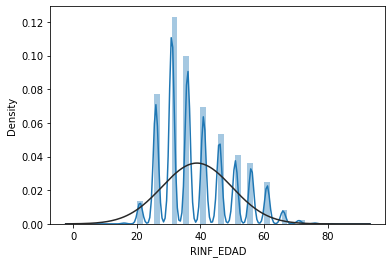

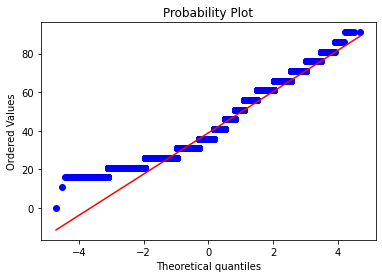

In [ ]:
sns.distplot(df['RINF_EDAD'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['RINF_EDAD'], plot = plt)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548403 entries, 1 to 573492
Data columns (total 31 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   NÚMERO DE DÍAS                         548403 non-null  int64
 1   SEXO TRABAJADOR                        548403 non-null  int64
 2   NÚMERO DE DÍAS AUTORIZADOS             548403 non-null  int64
 3   REGIÓN                                 548403 non-null  int64
 4   NÚMERO DÍAS A PAGAR                    548403 non-null  int64
 5   MONTO SUBSIDIO LIQUIDO                 548403 non-null  int64
 6   MONTO APORTE PREVISIONAL ISAPRE        548403 non-null  int64
 7   RECUPERABILIDAD                        548403 non-null  int64
 8   MONTO APORTE PREVISIONAL DE PENSIONES  548403 non-null  int64
 9   NÚMERO DÍAS PREVIOS AUTORIZADOS        548403 non-null  int64
 10  MONTO BASE CÁLCULO SUBSIDIO            548403 non-null  int64
 11  RINF_EDAD    